# No 1

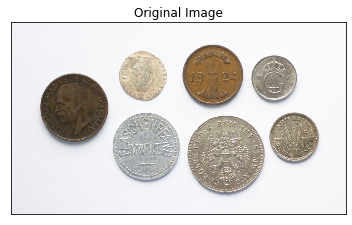

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('coins.png')
#img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

titles = ['Original Image']
images = [img, th1]


plt.subplot(1,1,1),plt.imshow(images[0],'gray')
plt.title(titles[0])
plt.xticks([]),plt.yticks([])
plt.imshow(img[:,:,::-1])

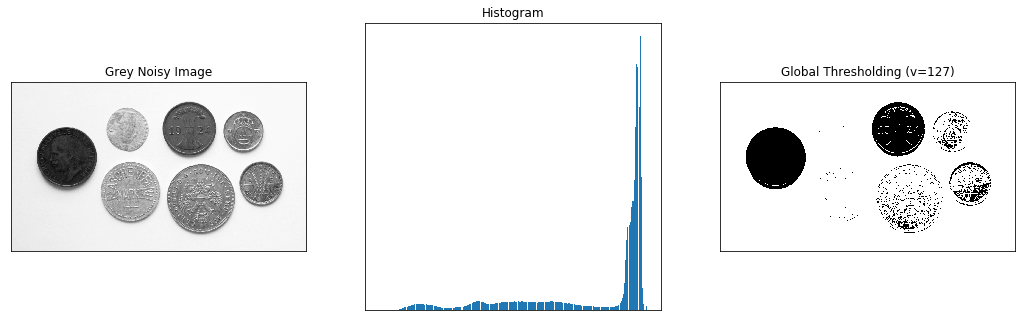

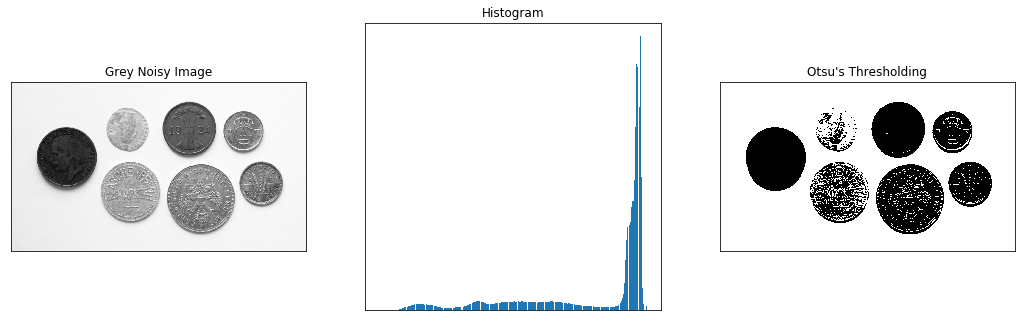

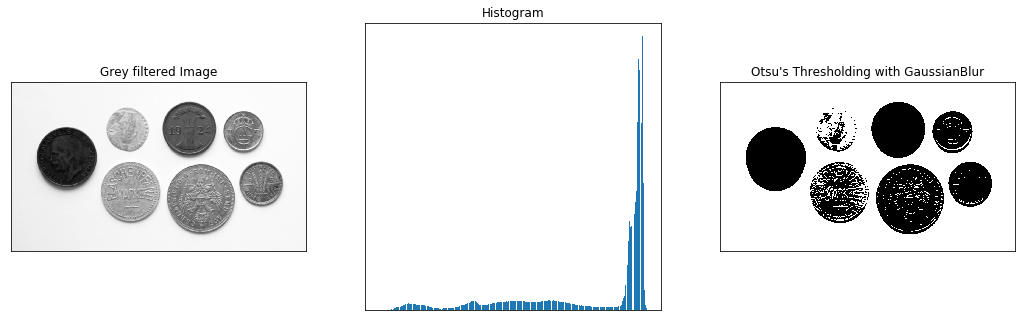

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('coins.png',0)
#plt.imshow(img[:,:,::-1])

# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv.threshold(img,127,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
gblur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(gblur,127,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          gblur, 0, th3]
titles = ['Grey Noisy Image','Histogram','Global Thresholding (v=127)',
          'Grey Noisy Image','Histogram',"Otsu's Thresholding",
          'Grey filtered Image','Histogram',"Otsu's Thresholding with GaussianBlur"]

for i in range(3):
    plt.figure(figsize=(18,18))
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

## Perbedaan

Dengan Otsu, objek yang cenderung berwarna gelap lebih mudah dibedakan dibandingkan dengan Global. Terlihat ada 2 koin yang kontrasnya menyerupai background.

## Metode lebih optimal

Untuk constraint ini Otsu mungkin lebih optimal karena bisa menunjukkan hampir semua koinnya dengan jelas

## Jumlah koin
Dengan menggunakan Thresholding dengan Thresh 127 dan maxValue 255, jumlah koin yang dilihat adalah 5.
Dengan Otsu dan Gaussian Blur kita bisa melihat 6 koin dan 1 koin yang agak kurang jelas.

# No 2

#### Untuk 10 segmen

SLIC number of segments: 5


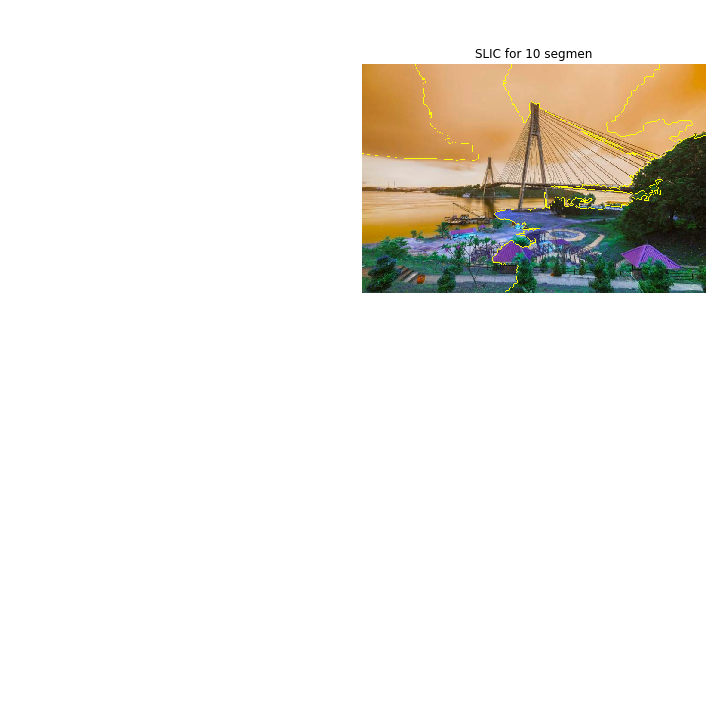

In [23]:
from skimage.segmentation import slic
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
import numpy as np

img2 = cv2.imread('jembatan.jpg')
segments_slic10 = slic(img2, n_segments=10, compactness=10, sigma=1)

print(f"SLIC number of segments: {len(np.unique(segments_slic10))}")
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax[0, 1].imshow(mark_boundaries(img2, segments_slic10))
ax[0, 1].set_title('SLIC for 10 segmen')

for a in ax.ravel():
 a.set_axis_off()
plt.tight_layout()
plt.show()

#### Untuk 50 segmen

SLIC number of segments: 38


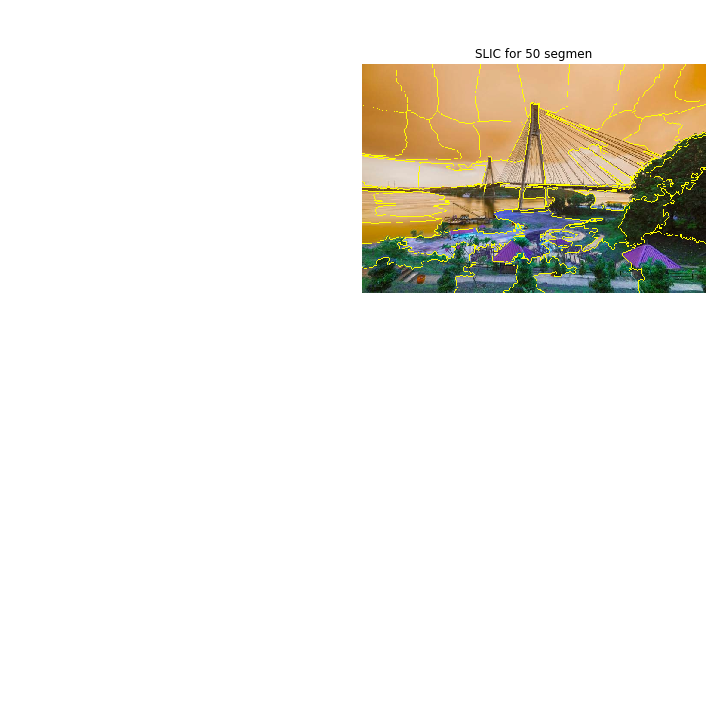

In [24]:
from skimage.segmentation import slic
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
import numpy as np

img2 = cv2.imread('jembatan.jpg')
segments_slic50 = slic(img2, n_segments=50, compactness=10, sigma=1)

print(f"SLIC number of segments: {len(np.unique(segments_slic50))}")
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax[0, 1].imshow(mark_boundaries(img2, segments_slic50))
ax[0, 1].set_title('SLIC for 50 segmen')

for a in ax.ravel():
 a.set_axis_off()
plt.tight_layout()
plt.show()

#### Untuk 100 segmen

SLIC number of segments: 68


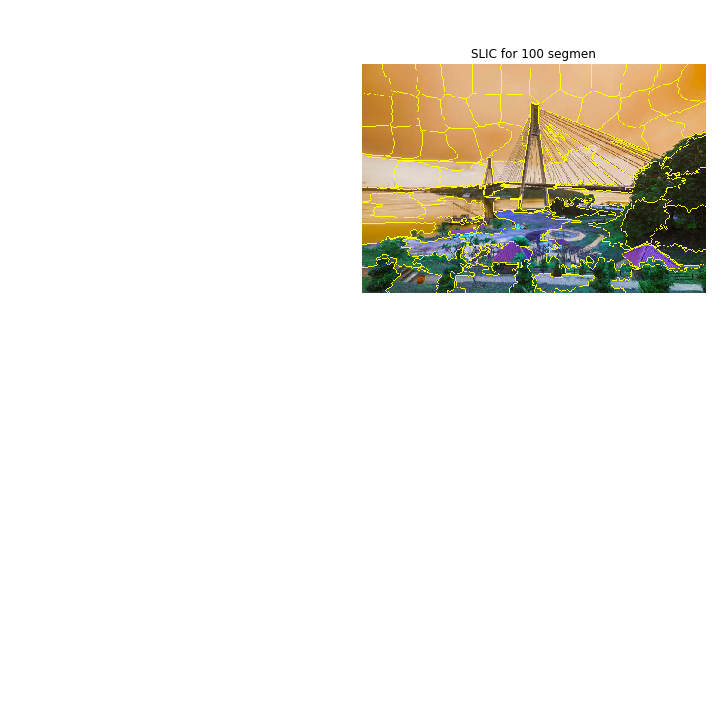

In [25]:
from skimage.segmentation import slic
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
import numpy as np

img2 = cv2.imread('jembatan.jpg')
segments_slic100 = slic(img2, n_segments=100, compactness=10, sigma=1)

print(f"SLIC number of segments: {len(np.unique(segments_slic100))}")
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax[0, 1].imshow(mark_boundaries(img2, segments_slic100))
ax[0, 1].set_title('SLIC for 100 segmen')

for a in ax.ravel():
 a.set_axis_off()
plt.tight_layout()
plt.show()

### Kesimpulan percobaan segmen

Dalam percobaan 10, 50 dan 100 segmen kami mendapatkan bahwa 100 segmen merupakan yang lebih baik. Karena dalam 10 dan 50 segmen, masih banyak terdapat beberapa objek yang disatukan. Dalam 100 segmen masih terdapat beberapa objek yang disatukan, namun sudah banyak berkurang dibandingkan dengan 10 dan 50 segmen

### Penyeragaman piksel dengan median

In [26]:
def superpixel_median_image(image, slic_labels):
    # taken from tutorial lab 5
    im_rp=image.reshape((image.shape[0]*image.shape[1],image.shape[2]))
    sli_1d=np.reshape(slic_labels,-1)
    uni=np.unique(sli_1d)
    new_img=np.zeros(im_rp.shape)
    for i in uni:
        loc=np.where(sli_1d==i)[0]
        #print(loc)
        mm=np.median(im_rp[loc,:],axis=0)
        new_img[loc,:]=mm
    return np.reshape(new_img,[image.shape[0],image.shape[1],image.shape[2]]).astype('uint8')

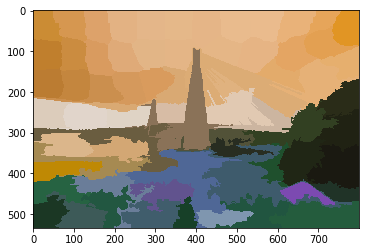

In [33]:
superpixel_image100 = superpixel_median_image(img2, segments_slic100)
plt.imshow(superpixel_image100)